In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from transformers import TFResNetForImageClassification, ResNetConfig
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

2025-11-06 15:20:16.375522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762442416.578024      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762442416.635819      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.18.0


In [2]:
print("--- KIỂM TRA GPU ---")
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Chỉ định TensorFlow chỉ sử dụng GPU đầu tiên nếu có nhiều cái
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        # Bật chế độ tăng trưởng bộ nhớ (memory growth) để tránh chiếm hết VRAM
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print(f"Đã phát hiện và thiết lập {len(gpus)} GPU:")
        print(gpus)
    except RuntimeError as e:
        # Lỗi xảy ra nếu thiết bị đã được khởi tạo
        print(e)
else:
    print("Không tìm thấy GPU. TensorFlow đang chạy trên CPU.")
print("--------------------")

--- KIỂM TRA GPU ---
Đã phát hiện và thiết lập 2 GPU:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
--------------------


In [3]:
import tensorflow as tf
from transformers import TFResNetForImageClassification, ResNetConfig
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


🤗 RESNET50 HUGGINGFACE FINE-TUNING
📁 Loading datasets...
Found 10043 files belonging to 21 classes.
Using 8035 files for training.


I0000 00:00:1762442446.809107      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


Found 10043 files belonging to 21 classes.
Using 2008 files for validation.
Found 6681 files belonging to 21 classes.
✅ Found 21 classes: ['banh-can', 'banh-hoi', 'banh-mi-chao', 'banh-tet', 'banh-trang-tron']...

🤗 Loading pretrained ResNet50 from HuggingFace...


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFResNetForImageClassification: ['resnet.encoder.stages.0.layers.0.layer.1.normalization.num_batches_tracked', 'resnet.encoder.stages.1.layers.2.layer.2.normalization.num_batches_tracked', 'resnet.encoder.stages.0.layers.1.layer.1.normalization.num_batches_tracked', 'resnet.encoder.stages.2.layers.0.shortcut.normalization.num_batches_tracked', 'resnet.encoder.stages.0.layers.2.layer.1.normalization.num_batches_tracked', 'resnet.encoder.stages.1.layers.3.layer.1.normalization.num_batches_tracked', 'resnet.encoder.stages.2.layers.4.layer.0.normalization.num_batches_tracked', 'resnet.encoder.stages.1.layers.1.layer.0.normalization.num_batches_tracked', 'resnet.encoder.stages.3.layers.0.layer.0.normalization.num_batches_tracked', 'resnet.encoder.

✅ Model loaded successfully!

🏋️ Training started...
📊 Training samples: ~8064
📊 Validation samples: ~2016
📊 Test samples: ~6688
Epoch 1/10


I0000 00:00:1762442482.224174      64 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1762442485.650252      64 service.cc:148] XLA service 0x78bd042f05e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762442485.651107      64 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762442485.828351      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


252/252 [==============================] - ETA: 0s - loss: 2.8162 - accuracy: 0.1691
Epoch 1: val_accuracy improved from -inf to 0.29283, saving model to best_resnet50_hf.keras


/usr/local/lib/python3.11/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


252/252 [==============================] - 144s 416ms/step - loss: 2.8162 - accuracy: 0.1691 - val_loss: 2.6157 - val_accuracy: 0.2928 - lr: 1.0000e-04
Epoch 2/10
252/252 [==============================] - ETA: 0s - loss: 1.8820 - accuracy: 0.5157
Epoch 2: val_accuracy improved from 0.29283 to 0.50946, saving model to best_resnet50_hf.keras
252/252 [==============================] - 97s 385ms/step - loss: 1.8820 - accuracy: 0.5157 - val_loss: 1.7833 - val_accuracy: 0.5095 - lr: 1.0000e-04
Epoch 3/10
252/252 [==============================] - ETA: 0s - loss: 1.0281 - accuracy: 0.7299
Epoch 3: val_accuracy improved from 0.50946 to 0.56424, saving model to best_resnet50_hf.keras
252/252 [==============================] - 97s 385ms/step - loss: 1.0281 - accuracy: 0.7299 - val_loss: 1.4635 - val_accuracy: 0.5642 - lr: 1.0000e-04
Epoch 4/10
252/252 [==============================] - ETA: 0s - loss: 0.5484 - accuracy: 0.8635
Epoch 4: val_accuracy improved from 0.56424 to 0.58516, saving model

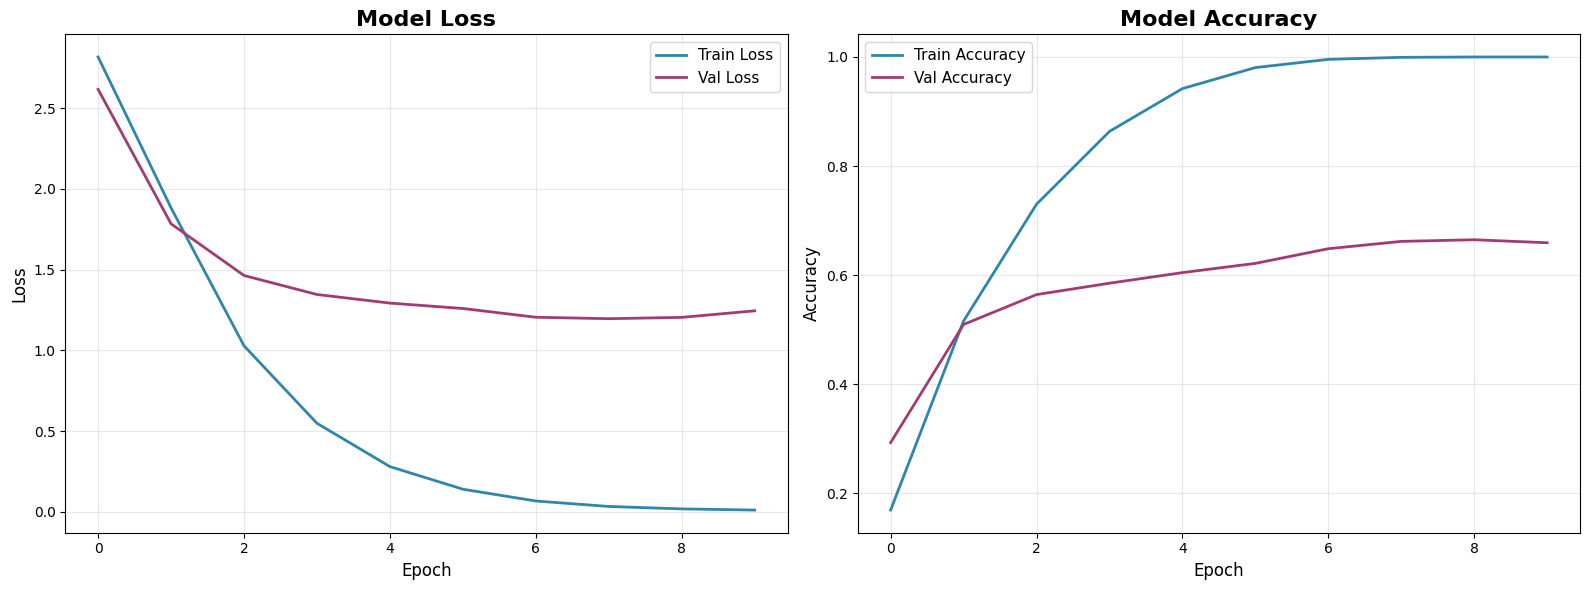


📊 Evaluating on test set...

📊 DETAILED TEST SET EVALUATION

🔮 Making predictions...

📈 OVERALL METRICS
✅ Accuracy:  0.6186 (61.86%)
✅ Precision: 0.6429 (64.29%)
✅ Recall:    0.6186 (61.86%)
✅ F1-Score:  0.6129 (61.29%)

📊 PER-CLASS METRICS
                  precision    recall  f1-score   support

        banh-can     0.6344    0.7344    0.6808       241
        banh-hoi     0.7461    0.3970    0.5183       607
    banh-mi-chao     0.7086    0.7993    0.7512       289
        banh-tet     0.9394    0.6813    0.7898       364
 banh-trang-tron     0.7716    0.4919    0.6008       309
          banh-u     0.4390    0.8580    0.5808       176
        banh-uot     0.5643    0.4857    0.5221       560
       bap-nuong     0.6597    0.8811    0.7545       143
          bo-kho     0.5203    0.4172    0.4631       338
       bo-la-lot     0.6697    0.8057    0.7314       458
       bot-chien     0.5330    0.4384    0.4811       276
           ca-ri     0.4032    0.2924    0.3390       171
   

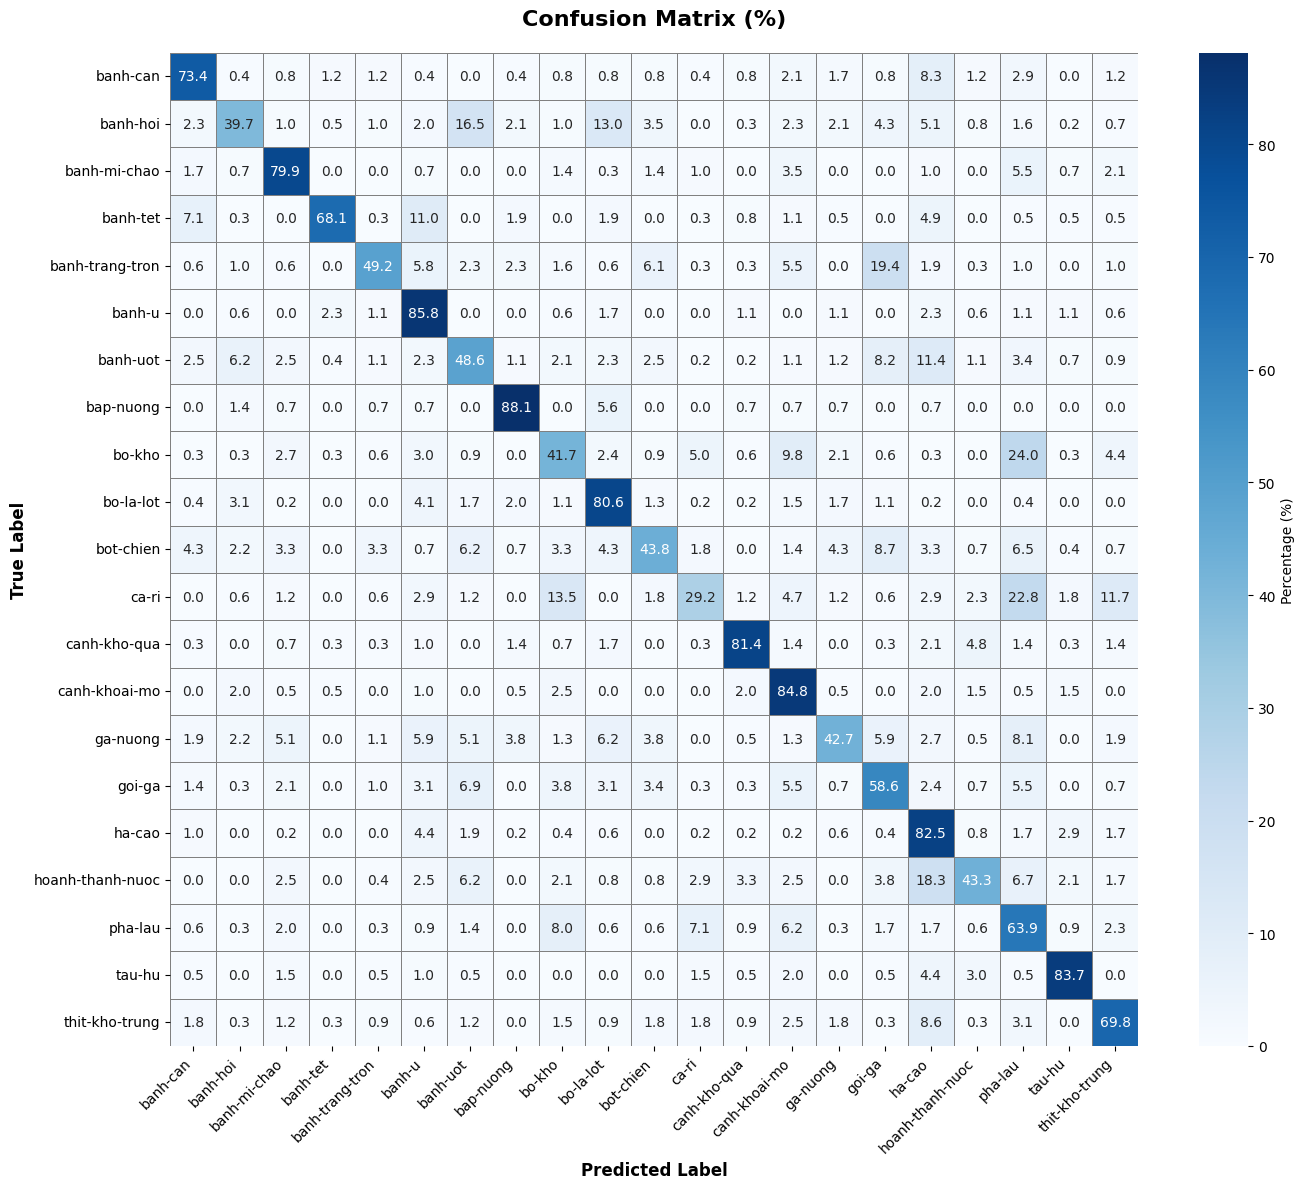


✅ TRAINING COMPLETED!
📈 Final Train Accuracy: 1.0000
📈 Final Val Accuracy:   0.6594
📈 Test Accuracy:        0.6186
📈 Test F1-Score:        0.6129

✅ Saved: test_metrics_resnet50_hf.json

🎉 All done! Check the output files:
   - best_resnet50_hf.keras
   - training_history_resnet50_hf.png
   - confusion_matrix_resnet50_hf.png
   - test_metrics_resnet50_hf.json


In [4]:
# =====================================
# 1. DATA AUGMENTATION
# =====================================
def get_augmentation():
    """
    Data augmentation cơ bản
    """
    return tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.042),  # ±15 degrees
        tf.keras.layers.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
        tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        tf.keras.layers.RandomContrast(factor=0.2),
        tf.keras.layers.RandomBrightness(factor=0.2),
    ], name='augmentation')


# =====================================
# 2. PREPROCESSING
# =====================================

def preprocess_train(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    # Normalize theo ImageNet (vẫn hoạt động trên channels-last)
    mean = tf.constant([0.485, 0.456, 0.406])
    std = tf.constant([0.229, 0.224, 0.225])
    image = (image - mean) / std
    
    # === Chuyển (B, H, W, C) sang (B, C, H, W) ===
    image = tf.transpose(image, perm=[0, 3, 1, 2])
    # 
    return image, label


def preprocess_test(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    mean = tf.constant([0.485, 0.456, 0.406])
    std = tf.constant([0.229, 0.224, 0.225])
    image = (image - mean) / std
    
    # === 💡 SỬA LỖI: Chuyển (B, H, W, C) sang (B, C, H, W) ===
    image = tf.transpose(image, perm=[0, 3, 1, 2])
    #
    return image, label


# =====================================
# 3. LOAD DATASET 
# =====================================
def load_dataset(train_dir, test_dir, batch_size=32):
    """
    Load VinaFood21 dataset với augmentation
    """
    print("📁 Loading datasets...")
    
    # === 💡 PHẦN BỊ THIẾU ĐÃ ĐƯỢC KHÔI PHỤC ===
    # Train dataset
    train_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='int'
    )
    
    # Validation dataset
    val_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='int'
    )
    
    # Test dataset
    test_ds = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='int',
        shuffle=False
    )
    
    # Get class names
    class_names = train_ds.class_names
    num_classes = len(class_names)
    
    print(f"✅ Found {num_classes} classes: {class_names[:5]}...")
    # === KẾT THÚC PHẦN KHÔI PHỤC ===

    # Apply preprocessing and augmentation
    AUTOTUNE = tf.data.AUTOTUNE
    augmentation = get_augmentation()
    
    # Áp dụng Augment (trên H, W, C) TRƯỚC
    # rồi mới Preprocess (Normalize + Transpose sang C, H, W)
    
    train_ds = (train_ds
        # 1. Augment (trên B, H, W, C)
        .map(lambda x, y: (augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
        # 2. Preprocess (Normalize + Transpose sang B, C, H, W)
        .map(preprocess_train, num_parallel_calls=AUTOTUNE)
        .cache()
        .prefetch(buffer_size=AUTOTUNE)
    )
    
    val_ds = (val_ds
        .map(preprocess_test, num_parallel_calls=AUTOTUNE) # Chỉ cần preprocess
        .cache()
        .prefetch(buffer_size=AUTOTUNE)
    )
    
    test_ds = (test_ds
        .map(preprocess_test, num_parallel_calls=AUTOTUNE) # Chỉ cần preprocess
        .cache()
        .prefetch(buffer_size=AUTOTUNE)
    )
    
    return train_ds, val_ds, test_ds, class_names, num_classes


# =====================================
# 4. BUILD MODEL FROM HUGGINGFACE
# =====================================
def build_resnet50_hf(num_classes=21, learning_rate=1e-4):
    """
    Load pretrained ResNet50 từ HuggingFace và fine-tune
    
    Args:
        num_classes: Số lượng classes (21 cho VinaFood21)
        learning_rate: Learning rate
    
    Returns:
        model: TensorFlow model đã compile
    """
    print("\n🤗 Loading pretrained ResNet50 from HuggingFace...")
    
    # Load pretrained ResNet50
    model = TFResNetForImageClassification.from_pretrained(
        'microsoft/resnet-50',
        num_labels=num_classes,
        ignore_mismatched_sizes=True  # Quan trọng! Cho phép thay đổi số classes
    )
    
    print("✅ Model loaded successfully!")
    
    # Compile model với optimizer tối ưu
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=learning_rate,
        weight_decay=1e-5,  # L2 regularization
        clipvalue=1.0  # Gradient clipping
    )
    
    # Loss function
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model


# =====================================
# 5. CALLBACKS
# =====================================
def get_callbacks(checkpoint_path='best_resnet50_hf.keras'):
    """
    Training callbacks
    """
    return [
        # Early Stopping
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
        
        # ReduceLROnPlateau
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-7,
            verbose=1
        ),
        
        # ModelCheckpoint
        tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            monitor='val_accuracy',
            save_best_only=True,
            mode='max',
            verbose=1
        )
    ]


# =====================================
# 6. VISUALIZATION FUNCTIONS
# =====================================
def plot_training_history(history):
    """Vẽ biểu đồ Training/Validation Loss và Accuracy"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Loss
    axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2, color='#2E86AB')
    axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2, color='#A23B72')
    axes[0].set_title('Model Loss', fontsize=16, fontweight='bold')
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Accuracy
    axes[1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, color='#2E86AB')
    axes[1].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2, color='#A23B72')
    axes[1].set_title('Model Accuracy', fontsize=16, fontweight='bold')
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy', fontsize=12)
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('training_history_resnet50_hf.png', dpi=300, bbox_inches='tight')
    print("\n✅ Saved: training_history_resnet50_hf.png")
    plt.show()


def evaluate_test_metrics(model, test_ds, class_names):
    """
    Đánh giá chi tiết trên test set
    """
    print("\n" + "="*60)
    print("📊 DETAILED TEST SET EVALUATION")
    print("="*60)
    
    # Predict
    print("\n🔮 Making predictions...")
    y_true = []
    y_pred = []
    
    for images, labels in test_ds:
        # HuggingFace model output
        outputs = model.predict(images, verbose=0)
        logits = outputs.logits
        predictions = tf.argmax(logits, axis=-1).numpy()
        
        y_pred.extend(predictions)
        y_true.extend(labels.numpy())
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate metrics
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    # Print metrics
    print("\n" + "="*60)
    print("📈 OVERALL METRICS")
    print("="*60)
    print(f"✅ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"✅ Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"✅ Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"✅ F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
    
    # Classification report
    print("\n" + "="*60)
    print("📊 PER-CLASS METRICS")
    print("="*60)
    report = classification_report(y_true, y_pred, target_names=class_names, digits=4, zero_division=0)
    print(report)
    
    # Confusion matrix
    print("\n🎨 Generating confusion matrix...")
    plot_confusion_matrix(y_true, y_pred, class_names)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }


def plot_confusion_matrix(y_true, y_pred, class_names):
    """Vẽ confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(
        cm_percent,
        annot=True,
        fmt='.1f',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names,
        cbar_kws={'label': 'Percentage (%)'},
        linewidths=0.5,
        linecolor='gray'
    )
    
    plt.title('Confusion Matrix (%)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.savefig('confusion_matrix_resnet50_hf.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: confusion_matrix_resnet50_hf.png")
    plt.show()


# =====================================
# 7. MAIN TRAINING FUNCTION
# =====================================
def train_resnet50_hf(train_dir, test_dir, epochs=30, batch_size=32, learning_rate=1e-4):
    """
    Main training function
    
    Args:
        train_dir: Đường dẫn thư mục train
        test_dir: Đường dẫn thư mục test
        epochs: Số epochs
        batch_size: Batch size
        learning_rate: Learning rate
    
    Returns:
        model: Trained model
        history: Training history
        test_metrics: Test metrics dictionary
    """
    print("=" * 60)
    print("🤗 RESNET50 HUGGINGFACE FINE-TUNING")
    print("=" * 60)
    
    # 1. Load datasets
    train_ds, val_ds, test_ds, class_names, num_classes = load_dataset(
        train_dir, test_dir, batch_size=batch_size
    )
    
    # 2. Build model
    model = build_resnet50_hf(num_classes=num_classes, learning_rate=learning_rate)
    
    # 3. Get callbacks
    callbacks = get_callbacks('best_resnet50_hf.keras')
    
    # 4. Train
    print("\n🏋️ Training started...")
    print(f"📊 Training samples: ~{len(train_ds) * batch_size}")
    print(f"📊 Validation samples: ~{len(val_ds) * batch_size}")
    print(f"📊 Test samples: ~{len(test_ds) * batch_size}")
    
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )
    
    # 5. Plot history
    print("\n📊 Plotting training history...")
    plot_training_history(history)
    
    # 6. Evaluate on test set
    print("\n📊 Evaluating on test set...")
    test_metrics = evaluate_test_metrics(model, test_ds, class_names)
    
    # 7. Final summary
    print("\n" + "="*60)
    print("✅ TRAINING COMPLETED!")
    print("="*60)
    print(f"📈 Final Train Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"📈 Final Val Accuracy:   {history.history['val_accuracy'][-1]:.4f}")
    print(f"📈 Test Accuracy:        {test_metrics['accuracy']:.4f}")
    print(f"📈 Test F1-Score:        {test_metrics['f1_score']:.4f}")
    print("="*60)
    
    # Save metrics
    import json
    with open('test_metrics_resnet50_hf.json', 'w') as f:
        json.dump({
            'accuracy': float(test_metrics['accuracy']),
            'precision': float(test_metrics['precision']),
            'recall': float(test_metrics['recall']),
            'f1_score': float(test_metrics['f1_score'])
        }, f, indent=4)
    print("\n✅ Saved: test_metrics_resnet50_hf.json")
    
    return model, history, test_metrics


# =====================================
# 8. USAGE EXAMPLE
# =====================================
if __name__ == "__main__":
    # Đường dẫn datasets
    train_dir = '/kaggle/input/vinafoodds201/VinaFood21/train'
    test_dir = '/kaggle/input/vinafoodds201/VinaFood21/test'
    
    # Train model
    model, history, test_metrics = train_resnet50_hf(
        train_dir=train_dir,
        test_dir=test_dir,
        epochs=10,  # Có thể giảm xuống vì pretrained
        batch_size=32,
        learning_rate=1e-4  # Learning rate thấp cho fine-tuning
    )
    
    print("\n🎉 All done! Check the output files:")
    print("   - best_resnet50_hf.keras")
    print("   - training_history_resnet50_hf.png")
    print("   - confusion_matrix_resnet50_hf.png")
    print("   - test_metrics_resnet50_hf.json")

>Mô hình đã được pre train trên image net và kiến trúc mới (resnet 50) tỏ ra vượt trội khi chỉ train 10 epoch đã cho ra F1 = 0.61